In [680]:
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import matplotlib.pyplot as plt

Input data:

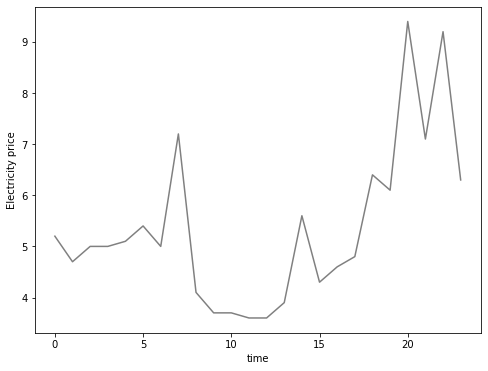

In [681]:
time=[*range(24)]
dispatchable = ['DG']
storage=['BESS']
generator=['PV', 'DG']
scenario=[1,2,3,4,5,6,7,8,9,10,11,12]

fix_cost = {'PV': 510, 'DG': 1000, 'BESS': 500}
#variable_cost = {'PV': 0.01, 'DG': 0.035244, 'BESS_C': 0.03738}
variable_cost = {'PV': 3, 'DG': 7, 'BESS_C': 0.8}

# cf_pv={ 0: {1:0, 2:0, 3:0, 4:0},
#          1: {1:0, 2:0, 3:0, 4:0},
#          2: {1:0, 2:0, 3:0, 4:0},
#          3: {1:0, 2:0, 3:0, 4:0},
#          4: {1:0, 2:0, 3:0, 4:0},
#          5: {1:0, 2:0, 3:0, 4:0},
#          6: {1:0, 2:0, 3:0, 4:0},
#          7: {1:0.042871048, 2:0.042871048, 3:0.042871048, 4:0.042871048},
#          8: {1:0.092273201, 2:0.092273201, 3:0.092273201, 4:0.092273201},
#          9: {1:0.138100119, 2:0.138100119, 3:0.138100119, 4:0.138100119},
#          10: {1:0.17, 2:0.17, 3:0.17, 4:0.17},
#          11: {1:0.17, 2:0.17, 3:0.17, 4:0.17},
#          12: {1:0.17, 2:0.17, 3:0.17, 4:0.17},
#          13: {1:0.17, 2:0.17, 3:0.17, 4:0.17},
#          14: {1:0.17, 2:0.17, 3:0.17, 4:0.17},
#          15: {1:0.135985947, 2:0.135985947, 3:0.135985947, 4:0.135985947},
#          16: {1:0.09082405, 2:0.09082405, 3:0.09082405, 4:0.09082405},
#          17: {1:0.04132661, 2:0.04132661, 3:0.04132661, 4:0.04132661},
#          18: {1:0.003142474, 2:0.003142474, 3:0.003142474, 4:0.003142474},
#          19: {1:0, 2:0, 3:0, 4:0},
#          20: {1:0, 2:0, 3:0, 4:0},
#          21: {1:0, 2:0, 3:0, 4:0},
#          22: {1:0, 2:0, 3:0, 4:0},
#          23: {1:0, 2:0, 3:0, 4:0}
#          }
cf_pv={0:{ 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0},
    1:{ 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0},
    2:{ 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0},
    3:{ 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0},
    4:{ 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0},
    5:{ 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0},
    6:{ 1:0.00163276826566506, 2:0.00163276826566506, 3:0.00163276826566506, 4:0.00166232304613565, 5:0.00166232304613565, 6:0.00166232304613565, 7:0.00174900085460457, 8:0.00174900085460457, 9:0.00174900085460457, 10:0.000542765740463296, 11:0.000542765740463296, 12:0.000542765740463296},
    7:{ 1:0.00207064702782069, 2:0.00207064702782069, 3:0.00207064702782069, 4:0.00210812786305385, 5:0.00210812786305385, 6:0.00210812786305385, 7:0.00221805108379397, 8:0.00221805108379397, 9:0.00221805108379397, 10:0.000688325643587544, 11:0.000688325643587544, 12:0.000688325643587544},
    8:{ 1:0.0508495989645644, 2:0.0508495989645644, 3:0.0508495989645644, 4:0.0517700288663564, 5:0.0517700288663564, 6:0.0517700288663564, 7:0.0544694516151054, 8:0.0544694516151054, 9:0.0544694516151054, 10:0.0169034521399285, 11:0.0169034521399285, 12:0.0169034521399285},
    9:{ 1:0.184688355868523, 2:0.184688355868523, 3:0.184688355868523, 4:0.18803140455948, 5:0.18803140455948, 6:0.18803140455948, 7:0.19783584666743, 8:0.19783584666743, 9:0.19783584666743, 10:0.0613942065974051, 11:0.0613942065974051, 12:0.0613942065974051},
    10:{ 1:0.0713593948834981, 2:0.0713593948834981, 3:0.0713593948834981, 4:0.072651073129974, 5:0.072651073129974, 6:0.072651073129974, 7:0.0764392873501041, 8:0.0764392873501041, 9:0.0764392873501041, 10:0.0237213299752482, 11:0.0237213299752482, 12:0.0237213299752482},
    11:{ 1:0.2, 2:0.2, 3:0.2, 4:0.2, 5:0.2, 6:0.2, 7:0.2, 8:0.2, 9:0.2, 10:0.0901496888154504, 11:0.0901496888154504, 12:0.0901496888154504},
    12:{ 1:0.146206976516371, 2:0.146206976516371, 3:0.146206976516371, 4:0.148853472767601, 5:0.148853472767601, 6:0.148853472767601, 7:0.156615076525954, 8:0.156615076525954, 9:0.156615076525954, 10:0.0486022049414861, 11:0.0486022049414861, 12:0.0486022049414861},
    13:{ 1:0.158185558247205, 2:0.158185558247205, 3:0.158185558247205, 4:0.16104887911516, 5:0.16104887911516, 6:0.16104887911516, 7:0.169446382795644, 8:0.169446382795644, 9:0.169446382795644, 10:0.052584131782885, 11:0.052584131782885, 12:0.052584131782885},
    14:{ 1:0.2, 2:0.2, 3:0.2, 4:0.2, 5:0.2, 6:0.2, 7:0.2, 8:0.2, 9:0.2, 10:0.0731376835274292, 11:0.0731376835274292, 12:0.0731376835274292},
    15:{ 1:0.2, 2:0.2, 3:0.2, 4:0.2, 5:0.2, 6:0.2, 7:0.2, 8:0.2, 9:0.2, 10:0.0819822979799788, 11:0.0819822979799788, 12:0.0819822979799788},
    16:{ 1:0.161606949931167, 2:0.161606949931167, 3:0.161606949931167, 4:0.164532201498199, 5:0.164532201498199, 6:0.164532201498199, 7:0.173111334586429, 8:0.173111334586429, 9:0.173111334586429, 10:0.0537214727208558, 11:0.0537214727208558, 12:0.0537214727208558},
    17:{ 1:0.0696524098784846, 2:0.0696524098784846, 3:0.0696524098784846, 4:0.0709131899453777, 5:0.0709131899453777, 6:0.0709131899453777, 7:0.0746107864566539, 8:0.0746107864566539, 9:0.0746107864566539, 10:0.0231538930647638, 11:0.0231538930647638, 12:0.0231538930647638},
    18:{ 1:0.00358837934749572, 2:0.00358837934749572, 3:0.00358837934749572, 4:0.0036533326945754, 5:0.0036533326945754, 6:0.0036533326945754, 7:0.00384382687818776, 8:0.00384382687818776, 9:0.00384382687818776, 10:0.0011928510705182, 11:0.0011928510705182, 12:0.0011928510705182},
    19:{ 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0},
    20:{ 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0},
    21:{ 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0},
    22:{ 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0},
    23:{ 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
    }
cf_dg= {0:0.6, 1:0.6, 2:0.6, 3:0.6, 4:0.6, 5:0.6, 6:0.6, 7:0.6, 8:0.6, 9:0.6, 10:0.6, 11:0.6, 12:0.6, 13:0.6, 14:0.6, 15:0.6, 16:0.6, 17:0.6, 18:0.6, 19:0.6, 20:0.6, 21:0.6, 22:0.6, 23:0.6}


# demand = {0: {1:12892, 2:14181.2, 3:11602.8, 4:13536.6},
#           1: {1:13478, 2:14825.8, 3:12130.2, 4:14151.9},
#           2: {1:12865, 2:14151.5, 3:11578.5, 4:13508.25},
#           3: {1:12577, 2:13834.7, 3:11319.3, 4:13205.85},
#           4: {1:12517, 2:13768.7, 3:11265.3, 4:13142.85},
#           5: {1:12670, 2:13937, 3:11403, 4:13303.5},
#           6: {1:13038, 2:14341.8, 3:11734.2, 4:13689.9},
#           7: {1:13692, 2:15061.2, 3:12322.8, 4:14376.6},
#           8: {1:14297, 2:15726.7, 3:12867.3, 4:15011.85},
#           9: {1:14719, 2:16190.9, 3:13247.1, 4:15454.95},
#           10: {1:14941, 2:16435.1, 3:13446.9, 4:15688.05},
#           11: {1:15184, 2:16702.4, 3:13665.6, 4:15943.2},
#           12: {1:15009, 2:16509.9, 3:13508.1, 4:15759.45},
#           13: {1:14808, 2:16288.8, 3:13327.2, 4:15548.4},
#           14: {1:14522, 2:15974.2, 3:13069.8, 4:15248.1},
#           15: {1:14349, 2:15783.9, 3:12914.1, 4:15066.45},
#           16: {1:14107, 2:15517.7, 3:12696.3, 4:14812.35},
#           17: {1:14410, 2:15851, 3:12969, 4:15130.5},
#           18: {1:15174, 2:16691.4, 3:13656.6, 4:15932.7},
#           19: {1:15261, 2:16787.1, 3:13734.9, 4:16024.05},
#           20: {1:14774, 2:16251.4, 3:13296.6, 4:15512.7},
#           21: {1:14363, 2:15799.3, 3:12926.7, 4:15081.15},
#           22: {1:14045, 2:15449.5, 3:12640.5, 4:14747.25},
#           23: {1:13478, 2:14825.8, 3:12130.2, 4:14151.9}
#           }
demand={0:{ 1:12774.2141646898, 2:12421.8550529442, 3:11899.2334374832, 4:12774.2141646898, 5:12421.8550529442, 6:11899.2334374832,
            7:12774.2141646898, 8:12421.8550529442, 9:11899.2334374832, 10:12774.2141646898, 11:12421.8550529442, 12:11899.2334374832},
        1:{ 1:11956.2043114153, 2:11602.1343626147, 3:11173.1884080747, 4:11956.2043114153, 5:11602.1343626147, 6:11173.1884080747,
            7:11956.2043114153, 8:11602.1343626147, 9:11173.1884080747, 10:11956.2043114153, 11:11602.1343626147, 12:11173.1884080747},
        2:{ 1:11485.6459115915, 2:11197.5165109971, 3:10834.755509957, 4:11485.6459115915, 5:11197.5165109971, 6:10834.755509957,
            7:11485.6459115915, 8:11197.5165109971, 9:10834.755509957, 10:11485.6459115915, 11:11197.5165109971, 12:10834.755509957},
        3:{ 1:11368.5171186991, 2:11129.2198957608, 3:10807.8464871345, 4:11368.5171186991, 5:11129.2198957608, 6:10807.8464871345,
            7:11368.5171186991, 8:11129.2198957608, 9:10807.8464871345, 10:11368.5171186991, 11:11129.2198957608, 12:10807.8464871345},
        4:{ 1:11717.5620946638, 2:11516.6804957695, 3:11224.8459109245, 4:11717.5620946638, 5:11516.6804957695, 6:11224.8459109245,
            7:11717.5620946638, 8:11516.6804957695, 9:11224.8459109245, 10:11717.5620946638, 11:11516.6804957695, 12:11224.8459109245},
        5:{ 1:12516.6745306391, 2:12336.9828706977, 3:12058.4928148819, 4:12516.6745306391, 5:12336.9828706977, 6:12058.4928148819,
            7:12516.6745306391, 8:12336.9828706977, 9:12058.4928148819, 10:12516.6745306391, 11:12336.9828706977, 12:12058.4928148819},
        6:{ 1:12662.6675887026, 2:12449.6977039881, 3:12123.2895463142, 4:12662.6675887026, 5:12449.6977039881, 6:12123.2895463142,
            7:12662.6675887026, 8:12449.6977039881, 9:12123.2895463142, 10:12662.6675887026, 11:12449.6977039881, 12:12123.2895463142},
        7:{ 1:12129.8982654524, 2:11780.2618286773, 3:11317.4999577184, 4:12129.8982654524, 5:11780.2618286773, 6:11317.4999577184,
            7:12129.8982654524, 8:11780.2618286773, 9:11317.4999577184, 10:12129.8982654524, 11:11780.2618286773, 12:11317.4999577184},
        8:{ 1:11300.2987131567, 2:10845.4897904508, 3:10263.0230948053, 4:11300.2987131567, 5:10845.4897904508, 6:10263.0230948053,
            7:11300.2987131567, 8:10845.4897904508, 9:10263.0230948053, 10:11300.2987131567, 11:10845.4897904508, 12:10263.0230948053},
        9:{ 1:10580.388256617, 2:10005.3319294726, 3:9316.72001482798, 4:10580.388256617, 5:10005.3319294726, 6:9316.72001482798,
            7:10580.388256617, 8:10005.3319294726, 9:9316.72001482798, 10:10580.388256617, 11:10005.3319294726, 12:9316.72001482798},
        10:{ 1:10316.2496796398, 2:9677.22759906132, 3:8909.05687325247, 4:10316.2496796398, 5:9677.22759906132, 6:8909.05687325247,
             7:10316.2496796398, 8:9677.22759906132, 9:8909.05687325247, 10:10316.2496796398, 11:9677.22759906132, 12:8909.05687325247},
        11:{ 1:10121.1800386267, 2:9364.04665587564, 3:8489.95556393769, 4:10121.1800386267, 5:9364.04665587564, 6:8489.95556393769,
             7:10121.1800386267, 8:9364.04665587564, 9:8489.95556393769, 10:10121.1800386267, 11:9364.04665587564, 12:8489.95556393769},
        12:{ 1:10568.0360130797, 2:9770.59530931245, 3:8885.42288136386, 4:10568.0360130797, 5:9770.59530931245, 6:8885.42288136386,
             7:10568.0360130797, 8:9770.59530931245, 9:8885.42288136386, 10:10568.0360130797, 11:9770.59530931245, 12:8885.42288136386},
        13:{ 1:11356.5656998433, 2:10589.0157634801, 3:9730.49328874283, 4:11356.5656998433, 5:10589.0157634801, 6:9730.49328874283,
             7:11356.5656998433, 8:10589.0157634801, 9:9730.49328874283, 10:11356.5656998433, 11:10589.0157634801, 12:9730.49328874283},
        14:{ 1:12629.7706361875, 2:11926.626382787, 3:11158.2552446374, 4:12629.7706361875, 5:11926.626382787, 6:11158.2552446374,
             7:12629.7706361875, 8:11926.626382787, 9:11158.2552446374, 10:12629.7706361875, 11:11926.626382787, 12:11158.2552446374},
        15:{ 1:14058.0947242573, 2:13477.294872714, 3:12830.378501153, 4:14058.0947242573, 5:13477.294872714, 6:12830.378501153,
             7:14058.0947242573, 8:13477.294872714, 9:12830.378501153, 10:14058.0947242573, 11:13477.294872714, 12:12830.378501153},
        16:{ 1:15601.8318800586, 2:15176.3809212167, 3:14636.5091801353, 4:15601.8318800586, 5:15176.3809212167, 6:14636.5091801353,
             7:15601.8318800586, 8:15176.3809212167, 9:14636.5091801353, 10:15601.8318800586, 11:15176.3809212167, 12:14636.5091801353},
        17:{ 1:16575.7185414686, 2:16246.5779326126, 3:15795.5621800629, 4:16575.7185414686, 5:16246.5779326126, 6:15795.5621800629,
             7:16575.7185414686, 8:16246.5779326126, 9:15795.5621800629, 10:16575.7185414686, 11:16246.5779326126, 12:15795.5621800629},
        18:{ 1:17046.711982715, 2:16743.6396424716, 3:16311.7608244087, 4:17046.711982715, 5:16743.6396424716, 6:16311.7608244087,
             7:17046.711982715, 8:16743.6396424716, 9:16311.7608244087, 10:17046.711982715, 11:16743.6396424716, 12:16311.7608244087},
        19:{ 1:16751.0597871845, 2:16488.1725653104, 3:16033.1143492051, 4:16751.0597871845, 5:16488.1725653104, 6:16033.1143492051,
             7:16751.0597871845, 8:16488.1725653104, 9:16033.1143492051, 10:16751.0597871845, 11:16488.1725653104, 12:16033.1143492051},
        20:{ 1:16168.9303708441, 2:15949.0340401097, 3:15517.0036907649, 4:16168.9303708441, 5:15949.0340401097, 6:15517.0036907649,
             7:16168.9303708441, 8:15949.0340401097, 9:15517.0036907649, 10:16168.9303708441, 11:15949.0340401097, 12:15517.0036907649},
        21:{ 1:14953.5810555947, 2:14721.7626346398, 3:14293.0708616052, 4:14953.5810555947, 5:14721.7626346398, 6:14293.0708616052,
             7:14953.5810555947, 8:14721.7626346398, 9:14293.0708616052, 10:14953.5810555947, 11:14721.7626346398, 12:14293.0708616052},
        22:{ 1:13587.9175966914, 2:13353.835982718, 3:12923.1743030172, 4:13587.9175966914, 5:13353.835982718, 6:12923.1743030172,
             7:13587.9175966914, 8:13353.835982718, 9:12923.1743030172, 10:13587.9175966914, 11:13353.835982718, 12:12923.1743030172},
        23:{ 1:12873.7897693977, 2:12763.2257026907, 3:12159.6423896804, 4:12873.7897693977, 5:12763.2257026907, 6:12159.6423896804,
             7:12873.7897693977, 8:12763.2257026907, 9:12159.6423896804, 10:12873.7897693977, 11:12763.2257026907, 12:12159.6423896804}
        }
c_sell=10
c_buy={0: 5.2, 1:4.7, 2:5, 3:5, 4:5.1, 5:5.4, 6:5.0, 7:7.2, 8:4.1, 9:3.7, 10:3.7, 11:3.6, 12:3.6, 13:3.9, 14:5.6, 15:4.3, 16:4.6, 17:4.8, 18:6.4, 19:6.1, 20:9.4, 21:7.1, 22:9.2, 23:6.3}

critical_percent=0.8
c_dist=30
c_res=10

min_production_dg = 1
max_production_dg = 15000
delta_ramp_up = 3000
delta_ramp_down = 3000
L_o = 6  # Min up-time
L_f = 6  # Min down-time

eff_ch = 0.99
eff_dch = 0.99
soc_max = 0.9
soc_min = 0.1
max_charge = 10000
min_charge = 0
max_discharge=10000
min_discharge=0
charge_ramp_up = 10000
charge_ramp_down = 10000
discharge_ramp_up = 10000
discharge_ramp_down = 10000
plt.plot(c_buy.keys(), c_buy.values(), color='gray',label="Electricity Price")
plt.xlabel('time')
plt.ylabel('Electricity price')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("Electricity price.png", dpi = 100)
plt.show()

Variables:

In [682]:
m = gp.Model('Model')

capacity = m.addVars(generator, vtype=GRB.CONTINUOUS, name='Generators capacity')
capacity_storage = m.addVars(storage, vtype=GRB.CONTINUOUS, name='Storage capacity')

production = m.addVars(generator, time, scenario, vtype=GRB.CONTINUOUS, name='Production level generators')
charge = m.addVars(storage, time, scenario, vtype=GRB.CONTINUOUS, name='Storage charge')
discharge = m.addVars(storage, time, scenario, vtype=GRB.CONTINUOUS, name='Storage discharge')
soc = m.addVars(storage, time, scenario, vtype=GRB.CONTINUOUS, name='SoC')

u_generator = m.addVars(dispatchable,time, scenario,vtype=GRB.BINARY, name='DG status')
u_charge = m.addVars(storage, time, scenario, vtype=GRB.BINARY, name='Charging status')
u_discharge = m.addVars(storage,time, scenario, vtype=GRB.BINARY, name='Discharging status')

enns = m.addVars(time, scenario, vtype=GRB.CONTINUOUS, name='electricity needed but not supplied')

Constraints:

    DG Constraints:

In [683]:
min_production_dg = m.addConstrs((production["DG", t, s] >= min_production_dg*u_generator["DG", t, s]
                                  for t in time
                                  for s in scenario))
# min_production_dg = m.addConstrs((production["DG", t, s] >= min_production_dg
#                                   for t in time
#                                   for s in scenario))
#
max_production_dg = m.addConstrs((production["DG", t,s] <= max_production_dg*u_generator["DG", t, s])
                                 for t in time
                                 for s in scenario)


# max_production_dg = m.addConstrs(production["DG", t,s] <= max_production_dg
#                                  for t in time
#                                  for s in scenario)

capacity_factor_dg = m.addConstrs(production["DG", t, s] <= capacity["DG"]*cf_dg[t]
                                  for t in time
                                  for s in scenario)


max_capacity_DG = m.addConstr(capacity["DG"] <= 100000)
# DG minimum Up-time
# for t=1

#min_up_time_1 = m.addConstr(gp.quicksum(u_generator["DG",t]
                                          #for t in [*range(L_o - 1)]) >= L_o)
# for t!=1

#min_up_time_2 = m.addConstrs((gp.quicksum(u_generator["DG", t + l]
                                          #for l in [*range(L_o-1)]) >= L_o * (u_generator["DG", t] - u_generator["DG", t-1])
                              #for t in [*range(1, len(time)-L_o+1)]))


# for t ending to nperiod
#min_up_time_3 = m.addConstr(gp.quicksum(u_generator["DG",l]
                                          #for l in [*range(len(time)-L_o+1, len(time))]) <= L_o * u_generator["DG", len(time)-L_o+1])

#DG minimum Down-time

#for t in [*range(1,len(time)-L_f)]:
    #min_down_time=m.addConstr(gp.quicksum(1-u_generator["DG",t+l]
                                            #for l in [*range(L_f-1)]) >= L_f*(u_generator["DG", t-1]-u_generator["DG", t]))

#DG ramp_up
#ramp_up_1 = m.addConstr(production["DG",0] <= delta_ramp_up)

ramp_up_2 = m.addConstrs((production["DG", t, s]-production["DG", t-1, s] <= delta_ramp_up
                          for t in [*range(1, len(time))]
                          for s in scenario))
#DG ramp_down
ramp_down_1 = m.addConstrs((production["DG", t-1, s]-production["DG", t, s] <= delta_ramp_down
                            for t in [*range(1, len(time))]
                            for s in scenario))

    PV Constraints:

In [684]:
capacity_factor_pv = m.addConstrs(production["PV", t, s] <= capacity["PV"]*cf_pv[t][s]
                                  for t in time
                                  for s in [*range(1,len(scenario)+1)])
max_capacity_pv = m.addConstr(capacity["PV"] <= 60000)

    BESS Constraints:

In [685]:
initial_charge_status=m.addConstrs(u_charge['BESS', 0, s] == 1 for s in scenario)
initial_discharge_status=m.addConstrs(u_discharge['BESS', 0, s] == 0 for s in scenario)
initial_discharge=m.addConstrs(discharge['BESS', 0, s]==0 for s in scenario)
initial_soc=m.addConstrs(soc['BESS',0,s]==0.1*capacity_storage['BESS'] for s in scenario)
#SoC
soc1=m.addConstrs(soc['BESS',t,s]==soc['BESS',t-1,s]+charge['BESS',t,s]*eff_ch-discharge['BESS',t,s]/eff_dch
                 for t in [*range(1,len(time))]
                 for s in scenario)

# Up/Down limit for SOC
# soc_max = m.addConstrs (gp.quicksum(charge['BESS', t, s]*eff_ch+charge['BESS', t-1, s]*eff_ch -
#                         discharge['BESS', t, s]/eff_dch-discharge['BESS', t-1, s]/eff_dch
#                                     for t in [*range(1,len(time))]
#                                     for s in scenario) <=
#                         soc_max * capacity_storage['BESS']
#                         for t in [*range(1,len(time))])
soc_max=m.addConstrs(soc['BESS',t,s]<=soc_max* capacity_storage['BESS']
                     for t in [*range(1,len(time))]
                     for s in scenario)

# soc_min = m.addConstrs (gp.quicksum(charge['BESS', t, s]*eff_ch + charge['BESS', t-1, s]*eff_ch -
#                        discharge['BESS', t, s]/eff_dch - discharge['BESS', t-1, s]/eff_dch
#                                     for t in [*range(1,len(time))]
#                                     for s in scenario) >=
#                         soc_min*capacity_storage['BESS']
#                         for t in [*range(1,len(time))])
soc_min = m.addConstrs (soc['BESS',t,s]>=soc_min * capacity_storage['BESS']
                     for t in [*range(1,len(time))]
                     for s in scenario)


# max charge
max_charge = m.addConstrs(charge['BESS', t, s] <= max_charge*u_charge['BESS', t, s]
                          for t in [*range(1,len(time))]
                          for s in scenario)
# min charge
#min_charge = m.addConstrs(charge[s,t] >= min_charge*u_charge[s,t]
                          #for t in [*range(1,len(time))]
                          #for s in storage)

# max discharge
max_discharge = m.addConstrs(discharge['BESS', t, s] <= max_discharge * u_discharge['BESS', t, s]
                             for t in [*range(1,len(time))]
                             for s in scenario)
# min discharge
#min_discharge = m.addConstrs(discharge[s,t] >= min_discharge*u_discharge[s,t]
                          #for t in [*range(1, len(time))]
                          #for s in storage)
# charge ramp_up
charge_ramp_up = m.addConstrs(charge['BESS', t, s]-charge['BESS', t-1, s] <= charge_ramp_up*u_charge['BESS', t, s]
                              for t in [*range(1,len(time))]
                              for s in scenario)
# charge ramp_down
charge_ramp_down = m.addConstrs(charge['BESS', t-1, s]-charge['BESS', t, s] <= charge_ramp_down*u_charge['BESS', t, s]
                                for t in [*range(1,len(time))]
                                for s in scenario)
# discharge ramp_up
discharge_ramp_up = m.addConstrs(discharge["BESS", t, s]-discharge['BESS',t-1, s]<=discharge_ramp_up*u_discharge['BESS', t, s]
                                 for t in [*range(1,len(time))]
                                 for s in scenario)
# discharge ramp_down
discharge_ramp_down = m.addConstrs(discharge['BESS', t-1, s]-discharge['BESS', t, s]<=discharge_ramp_down*u_discharge['BESS', t, s]
                                   for t in [*range(1,len(time))]
                                   for s in scenario)
#disabaling simultaneus charge/discharge
simultaneus_charge_discharge = m.addConstrs(u_discharge['BESS', t, s]+u_charge['BESS', t, s]<=1
                                            for t in [*range(1, len(time))]
                                            for s in scenario)

    System Constraints:

In [686]:
meet_demand1 = m.addConstrs(gp.quicksum(production[g, t, s] for g in generator) +
                            discharge['BESS', t, s] +
                            enns[t, s] -
                            charge['BESS', t, s] ==
                            demand[t][s]
                            for t in time
                            for s in [*range(1,len(scenario)+1)])

meet_demand2 = m.addConstrs(gp.quicksum(production[g, t, s] for g in generator) +
                            discharge['BESS', t, s] -
                            charge['BESS', t, s] >=
                            critical_percent*demand[t][s]
                            for t in time
                            for s in [*range(1,len(scenario)+1)])

Total_cost = m.setObjective(gp.quicksum(capacity[g] * fix_cost[g] for g in generator) +
                            (capacity_storage['BESS'] * fix_cost['BESS']) +
                            (1/len(scenario)) * gp.quicksum(
                            gp.quicksum(production[g, t, s]*variable_cost[g] for g in generator for t in time) +
                            gp.quicksum(charge['BESS',t,s]*c_buy[t] for t in time)+
                            gp.quicksum(enns[t, s] * c_dist * 15 for t in time) -
                            gp.quicksum(production["DG", t, s] * c_sell for t in time) -
                            gp.quicksum(production["PV", t, s] * c_sell * 30 for t in time) -
                            gp.quicksum(discharge["BESS", t, s] * c_sell * 20 for t in time) -
                            capacity["PV"] * c_res * 10-
                            capacity_storage["BESS"] * c_res * 10 for s in scenario)
                            , GRB.MINIMIZE)
m.Params.MIPGap=0.15
m.optimize()
print('runtime is',m.Runtime)

for var in m.getVars():
    print("{0} = {1}".format(var.varName, np.round(var.x, 2)))


Set parameter MIPGap to value 0.15
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 5090 rows, 2595 columns and 13106 nonzeros
Model fingerprint: 0x9ac18cb1
Variable types: 1731 continuous, 864 integer (864 binary)
Coefficient statistics:
  Matrix range     [5e-04, 2e+04]
  Objective range  [2e-01, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 1414 rows and 940 columns
Presolve time: 0.12s
Presolved: 3676 rows, 1655 columns, 10069 nonzeros
Variable types: 1275 continuous, 380 integer (380 binary)
Found heuristic solution: objective 2.601224e+07
Found heuristic solution: objective 2.571761e+07

Root relaxation: objective 1.021867e+07, 2421 iterations, 0.17 seconds (0.10 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Dept

This part process the outputs:

In [687]:
# def create_scenario_dataframes(time, scenario, u_discharge, u_charge, production, enns, charge, discharge, demand, soc):
#     #DG_plan = {}
#     DG_production = {}
#     Discharging_plan = {}
#     discharge_value = {}
#     Charging_plan = {}
#     charge_value = {}
#     PV_production = {}
#     enns_value = {}
#     Demand = {}
#     soc_plan = {}
#
#     for i in scenario:
#         for t in time:
#             # DG_plan[t, i] = u_generator["DG", t, i].x
#             Discharging_plan[t, i] = u_discharge["BESS", t, i].x
#             Charging_plan[t, i] = u_charge["BESS", t, i].x
#             PV_production[t, i] = production["PV", t, i].x
#             DG_production[t, i] = production["DG", t, i].x
#             enns_value[t, i] = enns[t, i].x
#             charge_value[t, i] = charge['BESS', t, i].x
#             discharge_value[t, i] = discharge['BESS', t, i].x
#             Demand[t,i]=demand[t][i]
#             soc_plan[t,i]=soc["BESS",t,i].x
#
#     result_dic = [DG_production, Discharging_plan, discharge_value, Charging_plan, charge_value, PV_production, enns_value, Demand, soc_plan]
#     df = pd.DataFrame(result_dic)
#     result = df.rename(index={0:'DG_production', 1:'Discharging_plan', 2:'Discharge_value', 3:'Charging_plan', 4:'Charging_value', 5:'PV_production', 6:'ENNS', 7:'Demand', 8:"SoC"})
#     result.to_csv('results')
#
#     n_scenarios = len(scenario)
#     scenario_dataframes = []
#     for i in range(n_scenarios):
#         start = i * len(time)
#         end = start + len(time)
#         scenario_df = result.iloc[:, start:end]
#         scenario_dataframes.append(scenario_df)
#
#     return scenario_dataframes
# output=create_scenario_dataframes(time, scenario, u_discharge, u_charge, production, enns, charge, discharge, demand, soc)
# print(output)


In [688]:
# ############Outputs##########
DG_plan_1={}
DG_production_1={}

Discharging_plan_1={}
discharge_value_1={}

Charging_plan_1={}
charge_value_1={}

PV_production_1={}

enns_value_1={}

Demand={}
soc_plan={}

for i in scenario:
    for t in time:
        DG_plan_1[t, i] = u_generator["DG", t, i].x
        Discharging_plan_1[t, i] = u_discharge["BESS", t, i].x
        Charging_plan_1[t, i] = u_charge["BESS", t, i].x
        PV_production_1[t, i] = production["PV", t, i].x
        DG_production_1[t, i] = production["DG", t, i].x
        enns_value_1[t, i] = enns[t, i].x
        charge_value_1[t, i] = charge['BESS', t, i].x
        discharge_value_1[t, i] = discharge['BESS', t, i].x
        Demand[t,i]=demand[t][i]
        soc_plan[t,i]=soc["BESS",t,i].x

result_dic_1=[DG_plan_1,DG_production_1,Discharging_plan_1,discharge_value_1,
        Charging_plan_1,charge_value_1,PV_production_1,enns_value_1,Demand,soc_plan]
# result_dic_1=[DG_production_1,Discharging_plan_1,discharge_value_1,
#         Charging_plan_1,charge_value_1,PV_production_1,enns_value_1,Demand,soc_plan]

df= pd.DataFrame(result_dic_1)
result_1=df.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',4:'Charging_plan',
                        5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',9:"SoC"})
# result_1=df.rename(index={0:'DG_production', 1:'Discharging_plan', 2:'Discharge_value',3:'Charging_plan',
#                         4:'Charging_value',5:'PV_production',6:'ENNS',7:'Demand',8:"SoC"})
result_1.to_csv('first results')

scenario1=result_1.iloc[:,:24]
scenario2=result_1.iloc[:,24:48]
scenario3=result_1.iloc[:,48:72]
scenario4=result_1.iloc[:,72:96]
scenario5=result_1.iloc[:,96:120]
scenario6=result_1.iloc[:,120:144]
scenario7=result_1.iloc[:,144:168]
scenario8=result_1.iloc[:,168:192]
scenario9=result_1.iloc[:,192:216]
scenario10=result_1.iloc[:,216:240]
scenario11=result_1.iloc[:,240:264]
scenario12=result_1.iloc[:,264:288]



Scenario1 plot:

In [689]:
# def plot_scenario(time, scenario):
#     plt.bar([*range(len(time))],scenario.iloc[11, :],color='blue',label="BESS_Charging")
#     plt.bar([*range(len(time))],scenario.iloc[6, :],color='orange',label="PV")
#     plt.bar([*range(len(time))],scenario.iloc[12, :],color='green',bottom=scenario.iloc[6, :],label="BESS_Discharging")
#     plt.bar([*range(len(time))],scenario.iloc[10, :],bottom=scenario.iloc[6, :]+scenario.iloc[12, :],color='gray',label="DG")
#     plt.plot([*range(len(time))],scenario.iloc[8, :],linestyle='dashed',color='red',label='Demand')
#     plt.plot([*range(len(time))],scenario.iloc[9, :],linestyle='-',color='blue',label='SoC')
#     Resilience = 1-round((sum(scenario.iloc[7,:]))/(sum(scenario.iloc[8,:])),2)
#     plt.text(5, 15000, 'R={}'.format(Resilience), style='italic')
#
#     plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14),
#             ncol=3, fancybox=True, shadow=True)
#     plt.xlabel('time')
#     plt.ylabel('Active Power [kW]')
#     plt.legend( loc="best",fontsize=7)
#     plt.title('Scenario 3')
#     figure = plt.gcf() # get current figure
#     figure.set_size_inches(8, 6)
#     # when saving, specify the DPI
#     plt.savefig("Scenario3.png", dpi = 100)
#     plt.show()
#
#
#
# for i, scenario in enumerate(output):
#     plot_scenario(time, scenario)
#     plt.title(f'Scenario {i + 1}')
#     plt.show()

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/3073368932.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario1 = scenario1.append(pd.Series(0, index=scenario1.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/3073368932.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario1 = scenario1.append(pd.Series(0, index=scenario1.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/3073368932.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario1 = scenario1.append(pd.Series(0, index=scenario1.columns), ignore_index=True) #Discharging


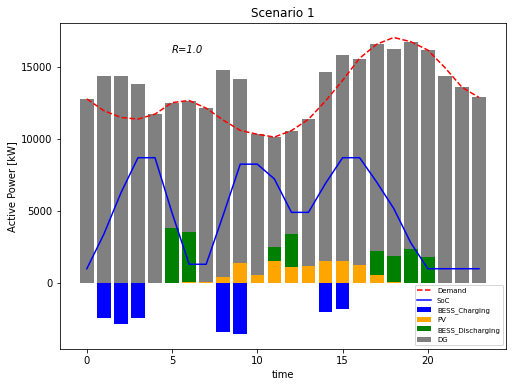

In [719]:
###################Scenario1 plot
scenario1 = scenario1.append(pd.Series(0, index=scenario1.columns), ignore_index=True) #DG
scenario1 = scenario1.append(pd.Series(0, index=scenario1.columns), ignore_index=True) #Charging
scenario1 = scenario1.append(pd.Series(0, index=scenario1.columns), ignore_index=True) #Discharging

scenario1=scenario1.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',4:'Charging_plan',
                        5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario1.iloc[10,t]=scenario1.iloc[0,t]*scenario1.iloc[1,t]
    scenario1.iloc[11, t] = scenario1.iloc[4, t] * scenario1.iloc[5, t]
    scenario1.iloc[11, t]=scenario1.iloc[11, t]*-1
    scenario1.iloc[12, t] = scenario1.iloc[2, t] * scenario1.iloc[3, t]

plt.bar([*range(len(time))],scenario1.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario1.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario1.iloc[12, :],color='green',bottom=scenario1.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario1.iloc[10, :],bottom=scenario1.iloc[6, :]+scenario1.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario1.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario1.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience1 = 1-round((sum(scenario1.iloc[7,:]))/(sum(scenario1.iloc[8,:])),2)
plt.text(5, 16000, 'R={}'.format(Resilience1), style='italic')

plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 1')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("Scenario1", dpi = 100)

plt.show()

Scenario2 plot:

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1607196215.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario2 = scenario2.append(pd.Series(0, index=scenario2.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1607196215.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario2 = scenario2.append(pd.Series(0, index=scenario2.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1607196215.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario2 = scenario2.append(pd.Series(0, index=scenario2.columns), ignore_index=True) #Discharging


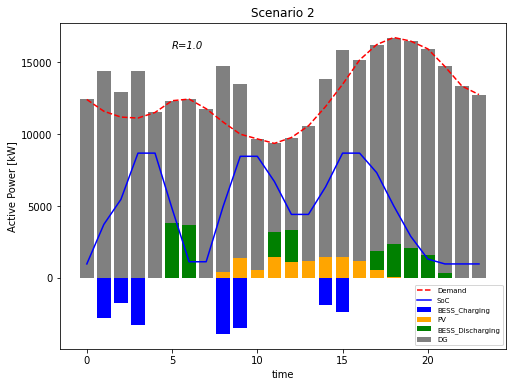

In [718]:
###################Scenario2 plot
scenario2 = scenario2.append(pd.Series(0, index=scenario2.columns), ignore_index=True) #DG
scenario2 = scenario2.append(pd.Series(0, index=scenario2.columns), ignore_index=True) #Charging
scenario2 = scenario2.append(pd.Series(0, index=scenario2.columns), ignore_index=True) #Discharging

scenario2=scenario2.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',4:'Charging_plan',
                        5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario2.iloc[10,t]=scenario2.iloc[0,t]*scenario2.iloc[1,t]
    scenario2.iloc[11, t] = scenario2.iloc[4, t] * scenario2.iloc[5, t]
    scenario2.iloc[11, t]=scenario2.iloc[11, t]*-1
    scenario2.iloc[12, t] = scenario2.iloc[2, t] * scenario2.iloc[3, t]

plt.bar([*range(len(time))],scenario2.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario2.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario2.iloc[12, :],color='green',bottom=scenario2.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario2.iloc[10, :],bottom=scenario2.iloc[6, :]+scenario2.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario2.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario2.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience2 = 1-round((sum(scenario2.iloc[7,:]))/(sum(scenario2.iloc[8,:])),2)
plt.text(5, 16000, 'R={}'.format(Resilience2), style='italic')

plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 2')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("Scenario2", dpi = 100)

plt.show()

Scenario3 plot:

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/315205429.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario3 = scenario3.append(pd.Series(0, index=scenario3.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/315205429.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario3 = scenario3.append(pd.Series(0, index=scenario3.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/315205429.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario3 = scenario3.append(pd.Series(0, index=scenario3.columns), ignore_index=True) #Discharging


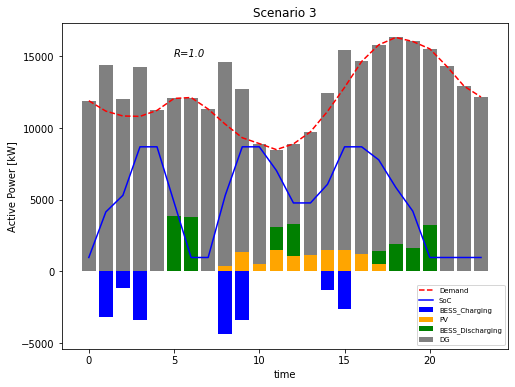

In [716]:
###################Scenario3 plot
scenario3 = scenario3.append(pd.Series(0, index=scenario3.columns), ignore_index=True) #DG
scenario3 = scenario3.append(pd.Series(0, index=scenario3.columns), ignore_index=True) #Charging
scenario3 = scenario3.append(pd.Series(0, index=scenario3.columns), ignore_index=True) #Discharging

scenario3=scenario3.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',4:'Charging_plan',
                        5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario3.iloc[10,t]=scenario3.iloc[0,t]*scenario3.iloc[1,t]
    scenario3.iloc[11, t] = scenario3.iloc[4, t] * scenario3.iloc[5, t]
    scenario3.iloc[11, t]=scenario3.iloc[11, t]*-1
    scenario3.iloc[12, t] = scenario3.iloc[2, t] * scenario3.iloc[3, t]

plt.bar([*range(len(time))],scenario3.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario3.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario3.iloc[12, :],color='green',bottom=scenario3.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario3.iloc[10, :],bottom=scenario3.iloc[6, :]+scenario3.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario3.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario3.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience3 = 1-round((sum(scenario3.iloc[7,:]))/(sum(scenario3.iloc[8,:])),2)
plt.text(5, 15000, 'R={}'.format(Resilience3), style='italic')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 3')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("Scenario3.png", dpi = 100)
plt.show()

Scenario4 plot:

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/756994870.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario4 = scenario4.append(pd.Series(0, index=scenario4.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/756994870.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario4 = scenario4.append(pd.Series(0, index=scenario4.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/756994870.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario4 = scenario4.append(pd.Series(0, index=scenario4.columns), ignore_index=True) #Discharging


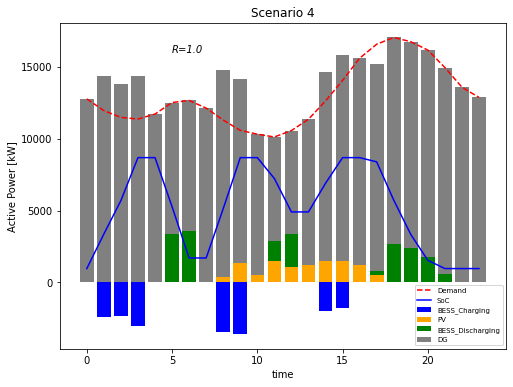

In [715]:
###################Scenario4 plot
scenario4 = scenario4.append(pd.Series(0, index=scenario4.columns), ignore_index=True) #DG
scenario4 = scenario4.append(pd.Series(0, index=scenario4.columns), ignore_index=True) #Charging
scenario4 = scenario4.append(pd.Series(0, index=scenario4.columns), ignore_index=True) #Discharging

scenario4=scenario4.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',4:'Charging_plan',
                        5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario4.iloc[10,t]=scenario4.iloc[0,t]*scenario4.iloc[1,t]
    scenario4.iloc[11, t] = scenario4.iloc[4, t] * scenario4.iloc[5, t]
    scenario4.iloc[11, t]=scenario4.iloc[11, t]*-1
    scenario4.iloc[12, t] = scenario4.iloc[2, t] * scenario4.iloc[3, t]

plt.bar([*range(len(time))],scenario4.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario4.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario4.iloc[12, :],color='green',bottom=scenario4.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario4.iloc[10, :],bottom=scenario4.iloc[6, :]+scenario4.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario4.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario4.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience4 = 1-round((sum(scenario4.iloc[7,:]))/(sum(scenario4.iloc[8,:])),2)
plt.text(5, 16000, 'R={}'.format(Resilience4), style='italic')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 4')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("Scenario4.png", dpi = 100)
plt.show()

In [694]:
# DG_plan = {}
# DG_production = {}
# Discharging_plan = {}
# discharge_value = {}
# Charging_plan = {}
# charge_value = {}
# PV_production = {}
# enns_value = {}
# Demand = {}
# soc_plan = {}
#
# for i in scenario:
#     DG_plan[i] = {}
#     DG_production[i] = {}
#     Discharging_plan[i] = {}
#     discharge_value[i] = {}
#     Charging_plan[i] = {}
#     charge_value[i] = {}
#     PV_production[i] = {}
#     enns_value[i] = {}
#     Demand[i] = {}
#     soc_plan[i] = {}
#
#     for t in time:
#         DG_plan[i][t] = u_generator["DG", t, i].x
#         Discharging_plan[i][t] = u_discharge["BESS", t, i].x
#         Charging_plan[i][t] = u_charge["BESS", t, i].x
#         PV_production[i][t] = production["PV", t, i].x
#         DG_production[i][t] = production["DG", t, i].x
#         enns_value[i][t] = enns[t, i].x
#         charge_value[i][t] = charge['BESS', t, i].x
#         discharge_value[i][t] = discharge['BESS', t, i].x
#         Demand[i][t] = demand[t][i]
#         soc_plan[i][t] = soc["BESS", t, i].x
#
# result_dic = {
#     "DG_plan": DG_plan,
#     "DG_production": DG_production,
#     "Discharging_plan": Discharging_plan,
#     "discharge_value": discharge_value,
#     "Charging_plan": Charging_plan,
#     "charge_value": charge_value,
#     "PV_production": PV_production,
#     "enns_value": enns_value,
#     "Demand": Demand,
#     "soc_plan": soc_plan
# }
#
# df = pd.DataFrame(result_dic)
# # results = df.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value', 4:'Charging_plan',
# #                         5:'Charging_value', 6:'PV_production', 7:'ENNS', 8:'Demand', 9:"SoC"})
# # print([*range(len(scenario))])
# for i in [*range(len(scenario))]:
#     scenarios = df.iloc[i,:]
#     scenarios.to_csv('result_scenarios_{}.csv'.format(i+1))
# print(df.iloc[1,:])

In [695]:
# def run_scenario(scenario, time):
#   scenario = scenario.append(pd.Series(0, index=scenario.columns), ignore_index=True) #DG
#   scenario = scenario.append(pd.Series(0, index=scenario.columns), ignore_index=True) #Charging
#   scenario = scenario.append(pd.Series(0, index=scenario.columns), ignore_index=True) #Discharging
#
#   # scenario = scenario.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',4:'Charging_plan',5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
#
#   for t in time:
#       scenario.iloc[10,t]=scenario.iloc[0,t]*scenario.iloc[1,t]
#       scenario.iloc[11, t] = scenario.iloc[4, t] * scenario.iloc[5, t]
#       scenario.iloc[11, t]=scenario.iloc[11, t]*-1
#       scenario.iloc[12, t] = scenario.iloc[2, t] * scenario.iloc[3, t]
#
#   plt.bar([*range(len(time))],scenario.iloc[11, :],color='blue',label="BESS_Charging")
#   plt.bar([*range(len(time))],scenario.iloc[6, :],color='orange',label="PV")
#   plt.bar([*range(len(time))],scenario.iloc[12, :],color='green',bottom=scenario.iloc[6, :],label="BESS_Discharging")
#   plt.bar([*range(len(time))],scenario.iloc[10, :],bottom=scenario.iloc[6, :]+scenario.iloc[12, :],color='gray',label="DG")
#   plt.plot([*range(len(time))],scenario.iloc[8, :],linestyle='dashed',color='red',label='Demand')
#   plt.plot([*range(len(time))],scenario.iloc[9, :],linestyle='-',color='blue',label='SoC')
#   Resilience = 1-round((sum(scenario.iloc[7,:]))/(sum(scenario.iloc[8,:])),2)
#   plt.text(5, 16000, 'R={}'.format(Resilience), style='italic')
#   plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.14),ncol=3, fancybox=True, shadow=True)
#   plt.xlabel('time')
#   plt.ylabel('Active Power [kW]')
#   plt.legend( loc="best",fontsize=7)
#   figure = plt.gcf() # get current figure
#   figure.set_size_inches(8, 6)
#   # when saving, specify the DPI
#   plt.savefig("Scenario.png", dpi = 100)
#   plt.show()

Scenario5 plot:

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1223468980.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario5 = scenario5.append(pd.Series(0, index=scenario5.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1223468980.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario5 = scenario5.append(pd.Series(0, index=scenario5.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1223468980.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario5 = scenario5.append(pd.Series(0, index=scenario5.columns), ignore_index=True) #Discharging


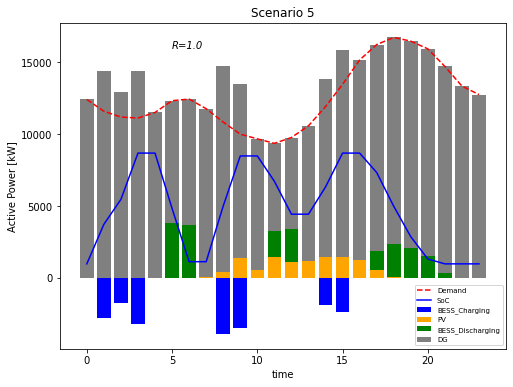

In [714]:
###################Scenario5 plot
scenario5 = scenario5.append(pd.Series(0, index=scenario5.columns), ignore_index=True) #DG
scenario5 = scenario5.append(pd.Series(0, index=scenario5.columns), ignore_index=True) #Charging
scenario5 = scenario5.append(pd.Series(0, index=scenario5.columns), ignore_index=True) #Discharging

scenario5=scenario5.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',
                                  4:'Charging_plan',5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',
                                  9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario5.iloc[10,t]=scenario5.iloc[0,t]*scenario5.iloc[1,t]
    scenario5.iloc[11, t] = scenario5.iloc[4, t] * scenario5.iloc[5, t]
    scenario5.iloc[11, t]=scenario5.iloc[11, t]*-1
    scenario5.iloc[12, t] = scenario5.iloc[2, t] * scenario5.iloc[3, t]

plt.bar([*range(len(time))],scenario5.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario5.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario5.iloc[12, :],color='green',bottom=scenario5.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario5.iloc[10, :],bottom=scenario5.iloc[6, :]+scenario5.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario5.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario5.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience5 = 1-round((sum(scenario5.iloc[7,:]))/(sum(scenario5.iloc[8,:])),2)
plt.text(5, 16000, 'R={}'.format(Resilience5), style='italic')

plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 5')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("Scenario5.png", dpi = 100)

plt.show()

Scenario6 plot:

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/3535157675.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario6 = scenario6.append(pd.Series(0, index=scenario6.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/3535157675.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario6 = scenario6.append(pd.Series(0, index=scenario6.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/3535157675.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario6 = scenario6.append(pd.Series(0, index=scenario6.columns), ignore_index=True) #Discharging


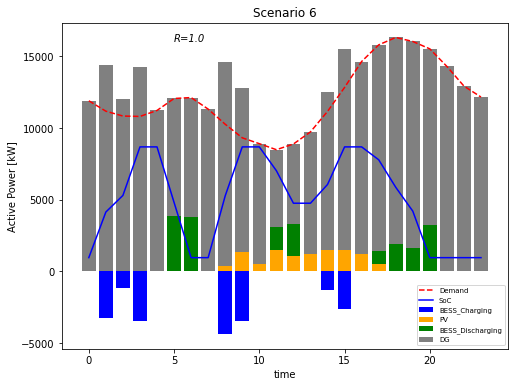

In [713]:
###################Scenario6 plot
scenario6 = scenario6.append(pd.Series(0, index=scenario6.columns), ignore_index=True) #DG
scenario6 = scenario6.append(pd.Series(0, index=scenario6.columns), ignore_index=True) #Charging
scenario6 = scenario6.append(pd.Series(0, index=scenario6.columns), ignore_index=True) #Discharging

scenario6=scenario6.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',
                                  4:'Charging_plan',5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',
                                  9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario6.iloc[10,t]=scenario6.iloc[0,t]*scenario6.iloc[1,t]
    scenario6.iloc[11, t] = scenario6.iloc[4, t] * scenario6.iloc[5, t]
    scenario6.iloc[11, t]=scenario6.iloc[11, t]*-1
    scenario6.iloc[12, t] = scenario6.iloc[2, t] * scenario6.iloc[3, t]

plt.bar([*range(len(time))],scenario6.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario6.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario6.iloc[12, :],color='green',bottom=scenario6.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario6.iloc[10, :],bottom=scenario6.iloc[6, :]+scenario6.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario6.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario6.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience6 = 1-round((sum(scenario6.iloc[7,:]))/(sum(scenario6.iloc[8,:])),2)
plt.text(5, 16000, 'R={}'.format(Resilience6), style='italic')

plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 6')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("scenario6.png", dpi = 100)

plt.show()

Scenario7 plot:

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/495987790.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario7 = scenario7.append(pd.Series(0, index=scenario7.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/495987790.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario7 = scenario7.append(pd.Series(0, index=scenario7.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/495987790.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario7 = scenario7.append(pd.Series(0, index=scenario7.columns), ignore_index=True) #Discharging


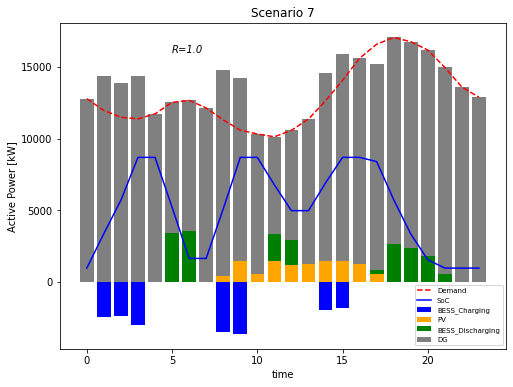

In [712]:
###################scenario7 plot
scenario7 = scenario7.append(pd.Series(0, index=scenario7.columns), ignore_index=True) #DG
scenario7 = scenario7.append(pd.Series(0, index=scenario7.columns), ignore_index=True) #Charging
scenario7 = scenario7.append(pd.Series(0, index=scenario7.columns), ignore_index=True) #Discharging

scenario7=scenario7.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',
                                  4:'Charging_plan',5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',
                                  9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario7.iloc[10,t]=scenario7.iloc[0,t]*scenario7.iloc[1,t]
    scenario7.iloc[11, t] = scenario7.iloc[4, t] * scenario7.iloc[5, t]
    scenario7.iloc[11, t]=scenario7.iloc[11, t]*-1
    scenario7.iloc[12, t] = scenario7.iloc[2, t] * scenario7.iloc[3, t]

plt.bar([*range(len(time))],scenario7.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario7.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario7.iloc[12, :],color='green',bottom=scenario7.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario7.iloc[10, :],bottom=scenario7.iloc[6, :]+scenario7.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario7.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario7.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience7 = 1-round((sum(scenario7.iloc[7,:]))/(sum(scenario7.iloc[8,:])),2)
plt.text(5, 16000, 'R={}'.format(Resilience7), style='italic')

plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 7')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("scenario7.png", dpi = 100)

plt.show()

Scenario8 plot:

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/2353891405.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario8 = scenario8.append(pd.Series(0, index=scenario8.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/2353891405.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario8 = scenario8.append(pd.Series(0, index=scenario8.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/2353891405.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario8 = scenario8.append(pd.Series(0, index=scenario8.columns), ignore_index=True) #Discharging


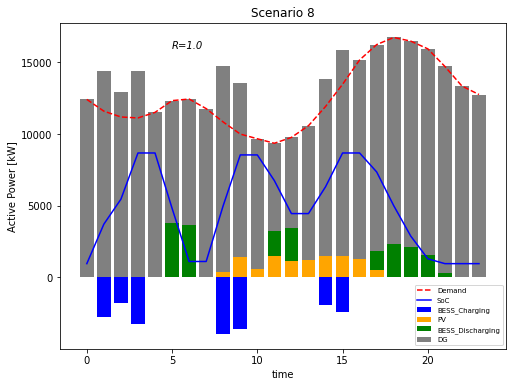

In [711]:
###################scenario8 plot
scenario8 = scenario8.append(pd.Series(0, index=scenario8.columns), ignore_index=True) #DG
scenario8 = scenario8.append(pd.Series(0, index=scenario8.columns), ignore_index=True) #Charging
scenario8 = scenario8.append(pd.Series(0, index=scenario8.columns), ignore_index=True) #Discharging

scenario8=scenario8.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',
                                  4:'Charging_plan',5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',
                                  9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario8.iloc[10,t]=scenario8.iloc[0,t]*scenario8.iloc[1,t]
    scenario8.iloc[11, t] = scenario8.iloc[4, t] * scenario8.iloc[5, t]
    scenario8.iloc[11, t]=scenario8.iloc[11, t]*-1
    scenario8.iloc[12, t] = scenario8.iloc[2, t] * scenario8.iloc[3, t]

plt.bar([*range(len(time))],scenario8.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario8.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario8.iloc[12, :],color='green',bottom=scenario8.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario8.iloc[10, :],bottom=scenario8.iloc[6, :]+scenario8.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario8.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario8.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience8 = 1-round((sum(scenario8.iloc[7,:]))/(sum(scenario8.iloc[8,:])),2)
plt.text(5, 16000, 'R={}'.format(Resilience8), style='italic')

plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 8')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("scenario8.png", dpi = 100)

plt.show()

Scenario9 plot:

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/383070781.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario9 = scenario9.append(pd.Series(0, index=scenario9.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/383070781.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario9 = scenario9.append(pd.Series(0, index=scenario9.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/383070781.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario9 = scenario9.append(pd.Series(0, index=scenario9.columns), ignore_index=True) #Discharging


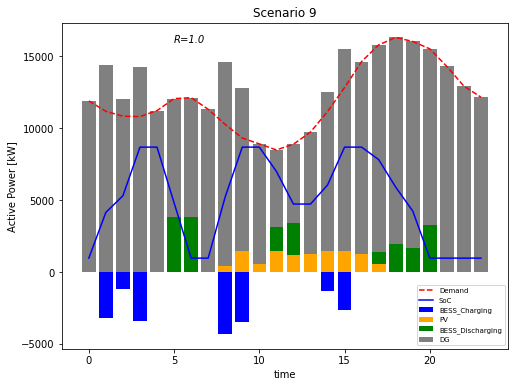

In [710]:
###################scenario9 plot
scenario9 = scenario9.append(pd.Series(0, index=scenario9.columns), ignore_index=True) #DG
scenario9 = scenario9.append(pd.Series(0, index=scenario9.columns), ignore_index=True) #Charging
scenario9 = scenario9.append(pd.Series(0, index=scenario9.columns), ignore_index=True) #Discharging

scenario9=scenario9.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',
                                  4:'Charging_plan',5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',
                                  9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario9.iloc[10,t]=scenario9.iloc[0,t]*scenario9.iloc[1,t]
    scenario9.iloc[11, t] = scenario9.iloc[4, t] * scenario9.iloc[5, t]
    scenario9.iloc[11, t]=scenario9.iloc[11, t]*-1
    scenario9.iloc[12, t] = scenario9.iloc[2, t] * scenario9.iloc[3, t]

plt.bar([*range(len(time))],scenario9.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario9.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario9.iloc[12, :],color='green',bottom=scenario9.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario9.iloc[10, :],bottom=scenario9.iloc[6, :]+scenario9.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario9.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario9.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience9 = 1-round((sum(scenario9.iloc[7,:]))/(sum(scenario9.iloc[8,:])),2)
plt.text(5, 16000, 'R={}'.format(Resilience9), style='italic')

plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 9')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("scenario9.png", dpi = 100)

plt.show()

Scenario10 plot:

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1638895129.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario10 = scenario10.append(pd.Series(0, index=scenario10.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1638895129.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario10 = scenario10.append(pd.Series(0, index=scenario10.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1638895129.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario10 = scenario10.append(pd.Series(0, index=scenario10.columns), ignore_index=True) #Discharging


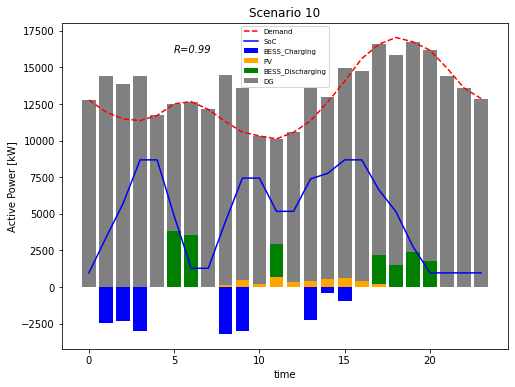

In [709]:
###################scenario10 plot
scenario10 = scenario10.append(pd.Series(0, index=scenario10.columns), ignore_index=True) #DG
scenario10 = scenario10.append(pd.Series(0, index=scenario10.columns), ignore_index=True) #Charging
scenario10 = scenario10.append(pd.Series(0, index=scenario10.columns), ignore_index=True) #Discharging

scenario10=scenario10.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',
                                  4:'Charging_plan',5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',
                                  9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario10.iloc[10,t]=scenario10.iloc[0,t]*scenario10.iloc[1,t]
    scenario10.iloc[11, t] = scenario10.iloc[4, t] * scenario10.iloc[5, t]
    scenario10.iloc[11, t]=scenario10.iloc[11, t]*-1
    scenario10.iloc[12, t] = scenario10.iloc[2, t] * scenario10.iloc[3, t]

plt.bar([*range(len(time))],scenario10.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario10.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario10.iloc[12, :],color='green',bottom=scenario10.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario10.iloc[10, :],bottom=scenario10.iloc[6, :]+scenario10.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario10.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario10.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience10 = 1-round((sum(scenario10.iloc[7,:]))/(sum(scenario10.iloc[8,:])),2)
plt.text(5, 16000, 'R={}'.format(Resilience10), style='italic')

plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 10')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("scenario10.png", dpi = 100)

plt.show()

Scenario11 plot:

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1867388251.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario11 = scenario11.append(pd.Series(0, index=scenario11.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1867388251.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario11 = scenario11.append(pd.Series(0, index=scenario11.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1867388251.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario11 = scenario11.append(pd.Series(0, index=scenario11.columns), ignore_index=True) #Discharging


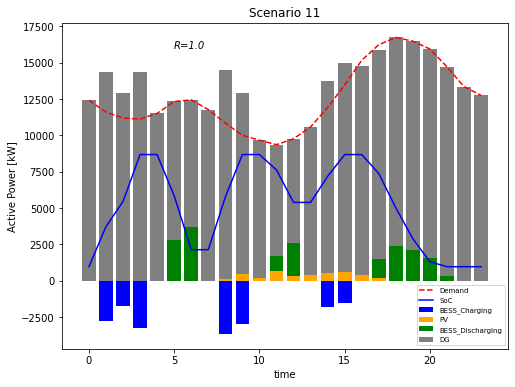

In [708]:
###################scenario11 plot
scenario11 = scenario11.append(pd.Series(0, index=scenario11.columns), ignore_index=True) #DG
scenario11 = scenario11.append(pd.Series(0, index=scenario11.columns), ignore_index=True) #Charging
scenario11 = scenario11.append(pd.Series(0, index=scenario11.columns), ignore_index=True) #Discharging

scenario11=scenario11.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',
                                  4:'Charging_plan',5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',
                                  9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario11.iloc[10,t]=scenario11.iloc[0,t]*scenario11.iloc[1,t]
    scenario11.iloc[11, t] = scenario11.iloc[4, t] * scenario11.iloc[5, t]
    scenario11.iloc[11, t]=scenario11.iloc[11, t]*-1
    scenario11.iloc[12, t] = scenario11.iloc[2, t] * scenario11.iloc[3, t]

plt.bar([*range(len(time))],scenario11.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario11.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario11.iloc[12, :],color='green',bottom=scenario11.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario11.iloc[10, :],bottom=scenario11.iloc[6, :]+scenario11.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario11.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario11.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience11 = 1-round((sum(scenario11.iloc[7,:]))/(sum(scenario11.iloc[8,:])),2)
plt.text(5, 16000, 'R={}'.format(Resilience11), style='italic')

plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 11')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("scenario11.png", dpi = 100)

plt.show()

Scenario12 plot:

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1939306103.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario12 = scenario12.append(pd.Series(0, index=scenario12.columns), ignore_index=True) #DG
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1939306103.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario12 = scenario12.append(pd.Series(0, index=scenario12.columns), ignore_index=True) #Charging
/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_17333/1939306103.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scenario12 = scenario12.append(pd.Series(0, index=scenario12.columns), ignore_index=True) #Discharging


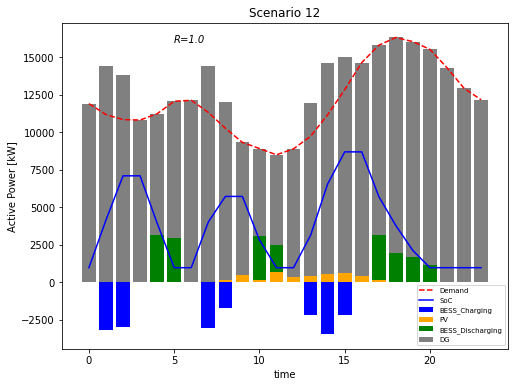

In [707]:
###################scenario12 plot
scenario12 = scenario12.append(pd.Series(0, index=scenario12.columns), ignore_index=True) #DG
scenario12 = scenario12.append(pd.Series(0, index=scenario12.columns), ignore_index=True) #Charging
scenario12 = scenario12.append(pd.Series(0, index=scenario12.columns), ignore_index=True) #Discharging

scenario12=scenario12.rename(index={0: 'DG_plan', 1:'DG_production', 2:'Discharging_plan', 3:'Discharge_value',
                                  4:'Charging_plan',5:'Charging_value',6:'PV_production',7:'ENNS',8:'Demand',
                                  9:'SoC',10:"DG",11:"Charging",12:'Discharging'})
for t in time:
    scenario12.iloc[10,t]=scenario12.iloc[0,t]*scenario12.iloc[1,t]
    scenario12.iloc[11, t] = scenario12.iloc[4, t] * scenario12.iloc[5, t]
    scenario12.iloc[11, t]=scenario12.iloc[11, t]*-1
    scenario12.iloc[12, t] = scenario12.iloc[2, t] * scenario12.iloc[3, t]

plt.bar([*range(len(time))],scenario12.iloc[11, :],color='blue',label="BESS_Charging")
plt.bar([*range(len(time))],scenario12.iloc[6, :],color='orange',label="PV")
plt.bar([*range(len(time))],scenario12.iloc[12, :],color='green',bottom=scenario12.iloc[6, :],label="BESS_Discharging")
plt.bar([*range(len(time))],scenario12.iloc[10, :],bottom=scenario12.iloc[6, :]+scenario12.iloc[12, :],color='gray',label="DG")
plt.plot([*range(len(time))],scenario12.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario12.iloc[9, :],linestyle='-',color='blue',label='SoC')
Resilience12 = 1-round((sum(scenario12.iloc[7,:]))/(sum(scenario12.iloc[8,:])),2)
plt.text(5, 16000, 'R={}'.format(Resilience12), style='italic')

plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.legend( loc="best",fontsize=7)
plt.title('Scenario 12')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
# when saving, specify the DPI
plt.savefig("scenario12.png", dpi = 100)

plt.show()